# Lead Scoring Case Study
### - Submitted by Thousif and Vivek

### Problem Statement 
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

#### Goals of the Case Study
There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [175]:
import warnings
warnings.filterwarnings('ignore')

In [176]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## Import Data

In [178]:
leads_df = pd.read_csv("Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [179]:
leads_df.shape

(9240, 37)

#### There are approximately 9.2k rows and 37 columns in the leads dataset

In [180]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### There are few columns which have null values which needs to handled

In [181]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

In [182]:
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

####  Inference : As observed above and mentioned in data dictonary as well the `'Prospect ID'` and `'Lead Number'` is a unique identity assigned to each row. These columns can be dropped as they wouldn't offer much help in model builiding or EDA

#### Dropping `'Prospect ID'` and `'Lead Number'` columns

In [183]:
leads_df.drop(labels=['Prospect ID','Lead Number'], axis=1, inplace=True)
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Select columns which are not object but have less than 200 unique values to check if they can be converted to categorical

In [184]:
num_cols_with_less_unique_values = {}

for col in leads_df.select_dtypes(exclude=['object']).columns:
    if len(leads_df[col].unique()) <= 200:
        num_cols_with_less_unique_values[col] = len(leads_df[col].unique())
        
num_cols_with_less_unique_values     

{'Converted': 2,
 'TotalVisits': 42,
 'Page Views Per Visit': 115,
 'Asymmetrique Activity Score': 13,
 'Asymmetrique Profile Score': 11}

#### None of the above columns can be converted to categorical 

#### As mentioned in the question there are categorical columns having `'Select'` as a value, this should be replaced with appropriate null value np.NaN

In [185]:
categorical_columns = list(leads_df.select_dtypes(include=['object']).columns)
categorical_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

#### Check how many columns has the value `'Select'` in them

In [186]:
leads_df.apply(lambda col: col.str.contains('Select'), axis=1).sum()

Lead Origin                                         0.0
Lead Source                                         0.0
Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
Page Views Per Visit                                0.0
Last Activity                                       0.0
Country                                             0.0
Specialization                                   1942.0
How did you hear about X Education               5043.0
What is your current occupation                     0.0
What matters most to you in choosing a course       0.0
Search                                              0.0
Magazine                                            0.0
Newspaper Article                                   0.0
X Education Forums                              

###### Replacing the `'Select'` with np.NaN

In [187]:
leads_df = leads_df.replace('Select', np.nan)

## Null Value Handling

In [188]:
# Get the percentage of null values for each columns in leads_df
percent_missing_values = round(100 * leads_df.isnull().sum()/leads_df.shape[0], 2)
percent_missing_values

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [189]:
# Let's drop the columns having more than 60% null values as they wouldn't offer much insights.
cols_with_high_nulls = percent_missing_values[percent_missing_values >= 60]
cols_with_high_nulls

How did you hear about X Education    78.46
Lead Profile                          74.19
dtype: float64

In [190]:
leads_df.drop(labels=list(cols_with_high_nulls.index), axis=1, inplace=True)

In [191]:
# Get the columns having missing values and sort by missing value percentage 
percent_missing_values = round(100 * leads_df.isnull().sum()/leads_df.shape[0], 2)
percent_missing_values[percent_missing_values > 0].sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

### Assessing `'Lead Quality'` for null values and it's imputation

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64


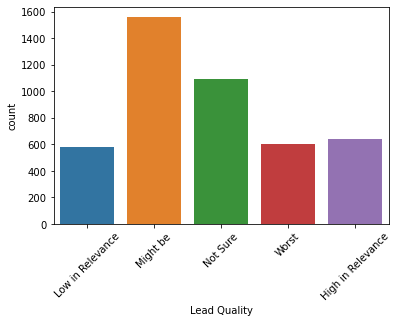

In [192]:
print(leads_df['Lead Quality'].value_counts())

sns.countplot(leads_df['Lead Quality'])
plt.xticks(rotation=45)
plt.show()

#### Inference : As the Lead Quality is based on the data and employee intuition we can easily assign a deafult of `'Not Sure'` to missing values in this column

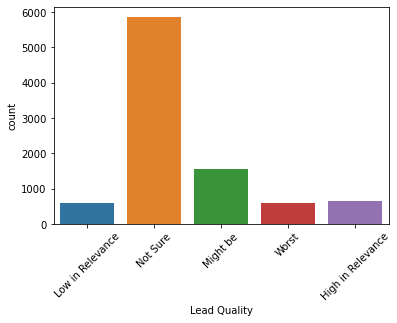

In [193]:
leads_df['Lead Quality'] = leads_df['Lead Quality'].replace(np.nan, 'Not Sure')

sns.countplot(leads_df['Lead Quality'])
plt.xticks(rotation=45)
plt.show()

### Assessing `'Asymmetrique Profile Score'`, `'Asymmetrique Profile Index'`  and `'Asymmetrique Activity Score'`, `'Asymmetrique Activity Index'` for null values and it's imputation

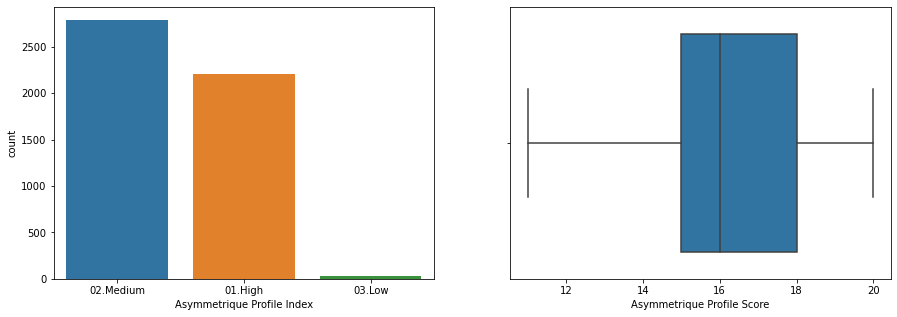

In [194]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.countplot(leads_df['Asymmetrique Profile Index'])

plt.subplot(1,2,2)
sns.boxplot(leads_df['Asymmetrique Profile Score'])

plt.show()

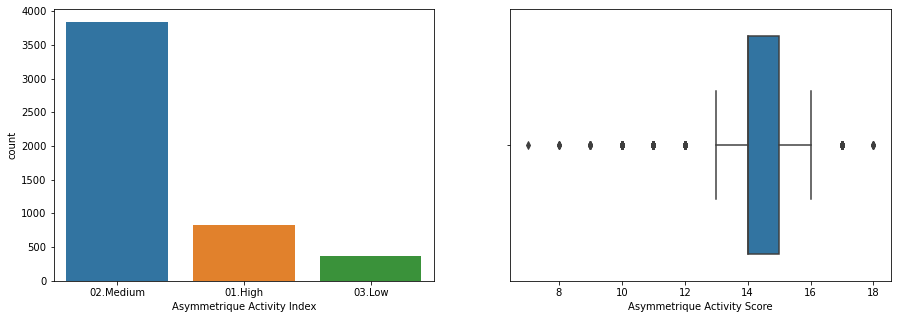

In [195]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.countplot(leads_df['Asymmetrique Activity Index'])

plt.subplot(1,2,2)
sns.boxplot(leads_df['Asymmetrique Activity Score'])

plt.show()

#### Inference : Since these columns don't have much information about the score and index is assigned we cannot impute the null values in these columns. It's better we can drop these columns as they have around 45% null values

In [196]:
leads_df.drop(labels=['Asymmetrique Profile Index','Asymmetrique Profile Score','Asymmetrique Activity Index','Asymmetrique Activity Score'], axis=1, inplace=True)

### Assessing `'City'` for null values and it's imputation

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64


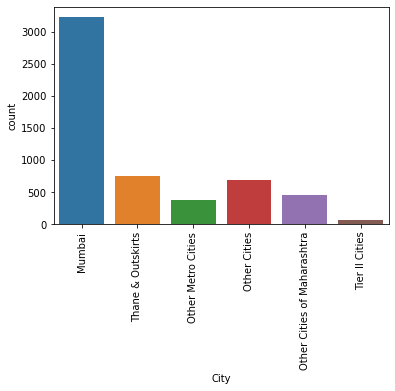

In [197]:
print(leads_df['City'].value_counts(normalize=True))

sns.countplot(leads_df['City'])
plt.xticks(rotation=90)
plt.show()

In [198]:
# As 60% of the data is Mumbai so we can impute Mumbai in the missing values.
leads_df['City'] = leads_df['City'].replace(np.nan, 'Mumbai')

### Assessing `'Specialization'` for null values and it's imputation

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: Specialization, dtype: float64


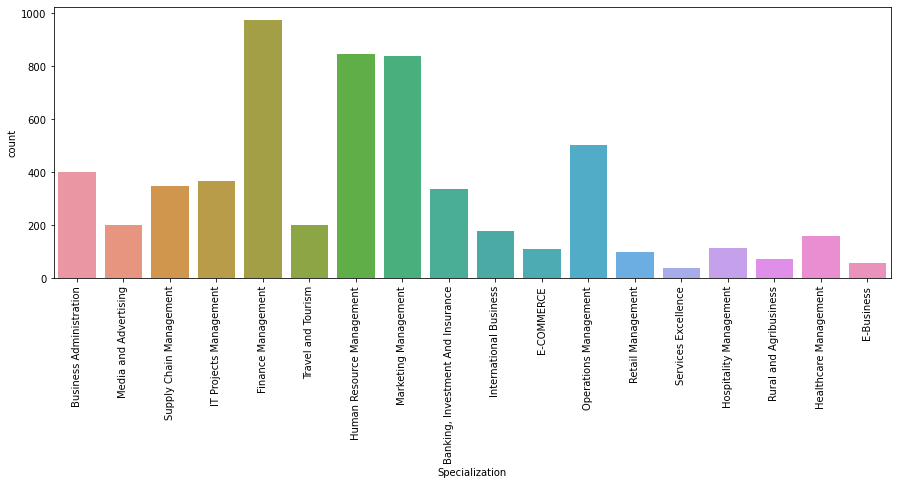

In [199]:
print(round(leads_df['Specialization'].value_counts(normalize=True)*100,2))

plt.figure(figsize=[15,5])
sns.countplot(leads_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

#### Inference : The customer might not have chosen the appropriate Specialization as it might have not been available or the customer didn't want to share it. So it would be safer to impute the np.NaN as `'Others'` 

In [200]:
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Others')

### Assessing `'Tags'` for null values and it's imputation

Will revert after reading the email                  35.20
Ringing                                              20.43
Interested in other courses                           8.71
Already a student                                     7.90
Closed by Horizzon                                    6.08
switched off                                          4.08
Busy                                                  3.16
Lost to EINS                                          2.97
Not doing further education                           2.46
Interested  in full time MBA                          1.99
Graduation in progress                                1.89
invalid number                                        1.41
Diploma holder (Not Eligible)                         1.07
wrong number given                                    0.80
opp hangup                                            0.56
number not provided                                   0.46
in touch with EINS                                    0.

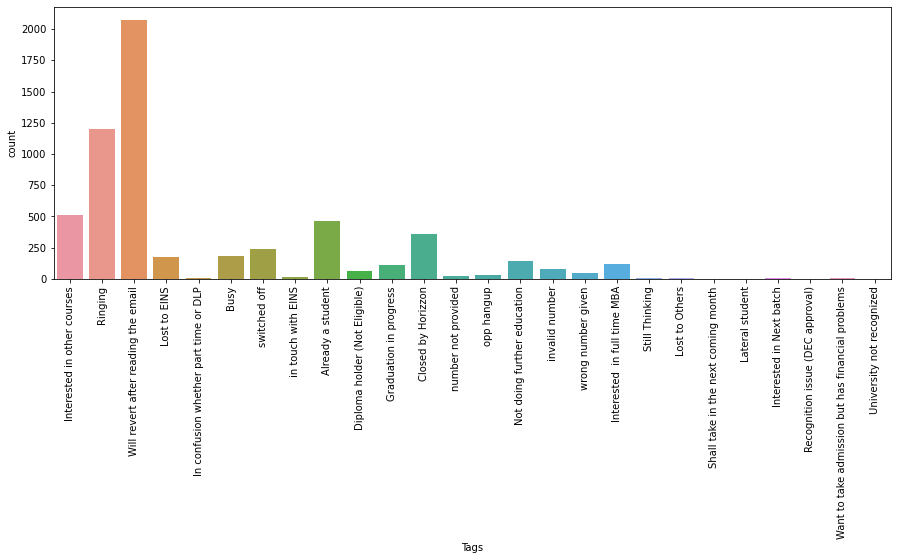

In [201]:
print(round(leads_df['Tags'].value_counts(normalize=True)*100,2))

plt.figure(figsize=[15,5])
sns.countplot(leads_df['Tags'])
plt.xticks(rotation=90)
plt.show()

#### Inference : We can input the the np.NaN values with most common value in this column `'Will revert after reading the email'` as this wouldn't incur any cost

In [202]:
leads_df['Tags'] = leads_df['Tags'].replace(np.nan, 'Will revert after reading the email')

### Assessing `'What matters most to you in choosing a course'` for null values and it's imputation 

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64


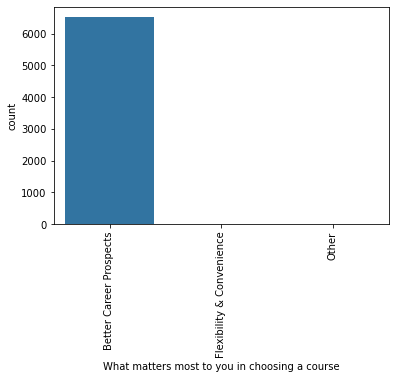

In [203]:
print(round(leads_df['What matters most to you in choosing a course'].value_counts(normalize=True)*100,2))

sns.countplot(leads_df['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

#### Inference : We can input the the np.NaN values with most common value in this column `'Better Career Prospects'`

In [204]:
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(
    np.nan, 'Better Career Prospects')

### Assessing `'What is your current occupation'` for null values and it's imputation 

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64


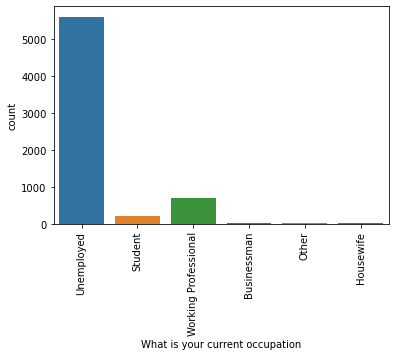

In [205]:
print(round(leads_df['What is your current occupation'].value_counts(normalize=True)*100,2))

sns.countplot(leads_df['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

#### Inference : As 86% entries are of Unemployed so we can impute "Unemployed" for the above column

In [206]:
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Unemployed')

### Assessing `'Country'` for null values and it's imputation

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Bahrain                  0.10
Hong Kong                0.10
Oman                     0.09
France                   0.09
unknown                  0.07
South Africa             0.06
Kuwait                   0.06
Nigeria                  0.06
Germany                  0.06
Canada                   0.06
Sweden                   0.04
Philippines              0.03
China                    0.03
Netherlands              0.03
Ghana                    0.03
Asia/Pacific Region      0.03
Belgium                  0.03
Italy                    0.03
Uganda                   0.03
Bangladesh               0.03
Malaysia                 0.01
Denmark                  0.01
Switzerland              0.01
Liberia                  0.01
Vietnam                  0.01
Tanzania  

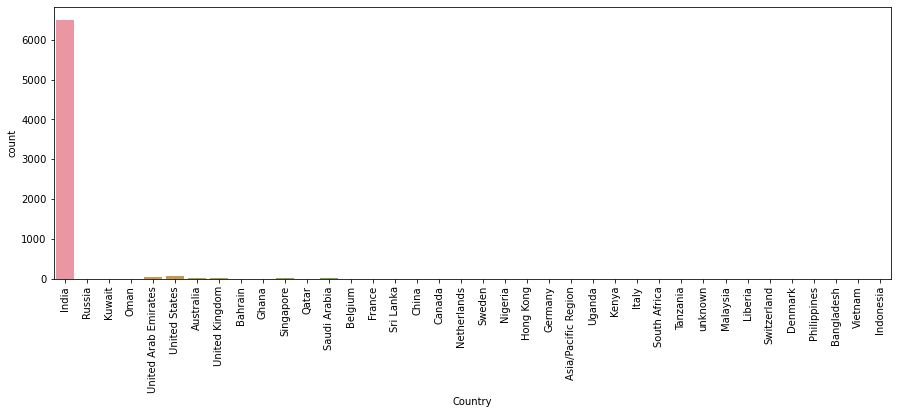

In [207]:
print(round(leads_df['Country'].value_counts(normalize=True)*100,2))

plt.figure(figsize=[15,5])

sns.countplot(leads_df['Country'])
plt.xticks(rotation=90)
plt.show()

#### Inference : India is the most repeated value for `'Country'` so let's impute the same in missing values.


In [208]:
leads_df['Country'] = leads_df['Country'].replace(np.nan, 'India')

In [209]:
# Get the columns having missing values and sort by missing value percentage 
percent_missing_values = round(100 * leads_df.isnull().sum()/leads_df.shape[0], 2)
percent_missing_values[percent_missing_values > 0].sort_values(ascending=False)

Page Views Per Visit    1.48
TotalVisits             1.48
Last Activity           1.11
Lead Source             0.39
dtype: float64

#### For the rest of the columns the missing value percentage is very low so we can drop the corresponding rows

In [210]:
leads_df.dropna(inplace = True)

In [211]:
leads_df.shape

(9074, 29)

## Exploratory Data Analysis

#### As the data has been cleaned let's proceed with EDA

### Univariate Analysis

In [212]:
categorical_columns = leads_df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = leads_df.select_dtypes(include=np.number).columns.tolist()

print("Categorical Columns --->", categorical_columns)
print("\n\nNumerical Columns --->", numerical_columns)

Categorical Columns ---> ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


Numerical Columns ---> ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


#### We will perform univariate analysis with respect to our target variable `'Converted'`

In [270]:
BOLD = '\033[1m'
END = '\033[0m'

def display_in_bold(statement):
    print(BOLD + statement + END)
    

def get_stats_and_cat_segmented_plot(col_name, fig_size, rotate_xticks):
    
        display_in_bold(BOLD + '\nStats with respect to Target Variable' + END)
        display(leads_df.groupby(by=col_name).agg({'Converted':['count','sum','mean']}))
        
        if not fig_size:
            fig_size=[15,6]
        
        if not rotate_xticks:
            rotate_xticks=90
            
        display_in_bold("\nPlots comparison without and with Converted variable segmentation\n")
        
        plt.figure(figsize=fig_size)
        
        plt.subplot(1,2,1)
        sns.countplot(x=col_name, data=leads_df)
        plt.xlabel(col_name)
        if rotate_xticks:
            plt.xticks(rotation=rotate_xticks)

        plt.subplot(1,2,2)
        sns.countplot(x=col_name, hue='Converted' ,data=leads_df)
        plt.xlabel("{0} w.r.t Converted".format(col_name))
        if rotate_xticks:
            plt.xticks(rotation=rotate_xticks)

        plt.show()

#### `'Lead Origin'` Analysis


Stats with respect to Target Variable


Converted                
                            count   sum      mean
Lead Origin                                      
API                          3578  1115  0.311627
Landing Page Submission      4885  1767  0.361720
Lead Add Form                 581   544  0.936317
Lead Import                    30     9  0.300000


Plots comparison without and with Converted variable segmentation



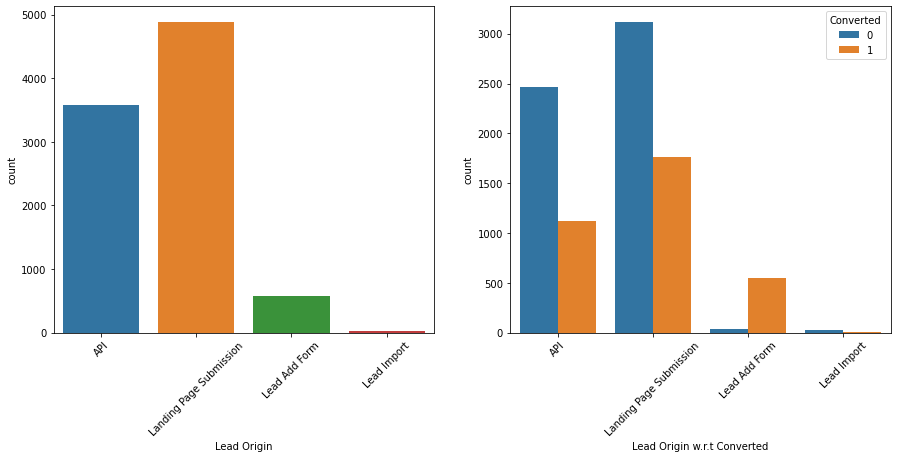

In [271]:
get_stats_and_cat_segmented_plot('Lead Origin',[], 45)

#### Inference
- API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- Lead Import are very less in count.

**To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.**